In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

#yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
company_name = ['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for i in range(4):
    globals()[tech_list[i]] = yf.download(tech_list[i], start, end).assign(Company=company_name[i])

company_list = [AAPL, GOOG, MSFT, AMZN]

print(company_list)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

[Price            Close        High         Low        Open    Volume Company
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL        
Date                                                                        
2024-03-04  174.277115  176.068644  172.973259  175.322168  81510100   APPLE
2024-03-05  169.320480  171.231455  168.822830  169.957472  95132400   APPLE
2024-03-06  168.325195  170.435242  167.887261  170.256080  68587700   APPLE
2024-03-07  168.205750  169.927615  167.698152  168.355038  71765100   APPLE
2024-03-08  169.927612  172.883655  168.146031  168.205747  76114600   APPLE
...                ...         ...         ...         ...       ...     ...
2025-02-24  247.100006  248.860001  244.419998  244.929993  51326400   APPLE
2025-02-25  247.039993  250.000000  244.910004  248.000000  48013300   APPLE
2025-02-26  240.360001  244.979996  239.130005  244.330002  44433600   APPLE
2025-02-27  237.300003  242.460007  237.059998  239.410004  41153600   APPL

In [4]:
AAPL.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,249.000000,249.000000,249.000000,249.000000,2.490000e+02
mean,214.826108,216.731367,212.639686,214.544145,5.637052e+07
std,25.815659,25.914361,25.376479,25.679360,3.093782e+07
min,164.224548,165.617963,163.308874,164.572913,2.323470e+07
25%,191.705704,192.353504,190.280486,191.625965,4.039830e+07
50%,223.584167,225.573545,221.934105,224.006998,4.915150e+07
75%,232.214691,233.336461,229.065854,231.199997,6.250100e+07
max,258.735504,259.814335,257.347047,257.906429,3.186799e+08


In [5]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2024-03-04 to 2025-02-28
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   249 non-null    float64
 1   (High, AAPL)    249 non-null    float64
 2   (Low, AAPL)     249 non-null    float64
 3   (Open, AAPL)    249 non-null    float64
 4   (Volume, AAPL)  249 non-null    int64  
 5   (Company, )     249 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 13.6+ KB


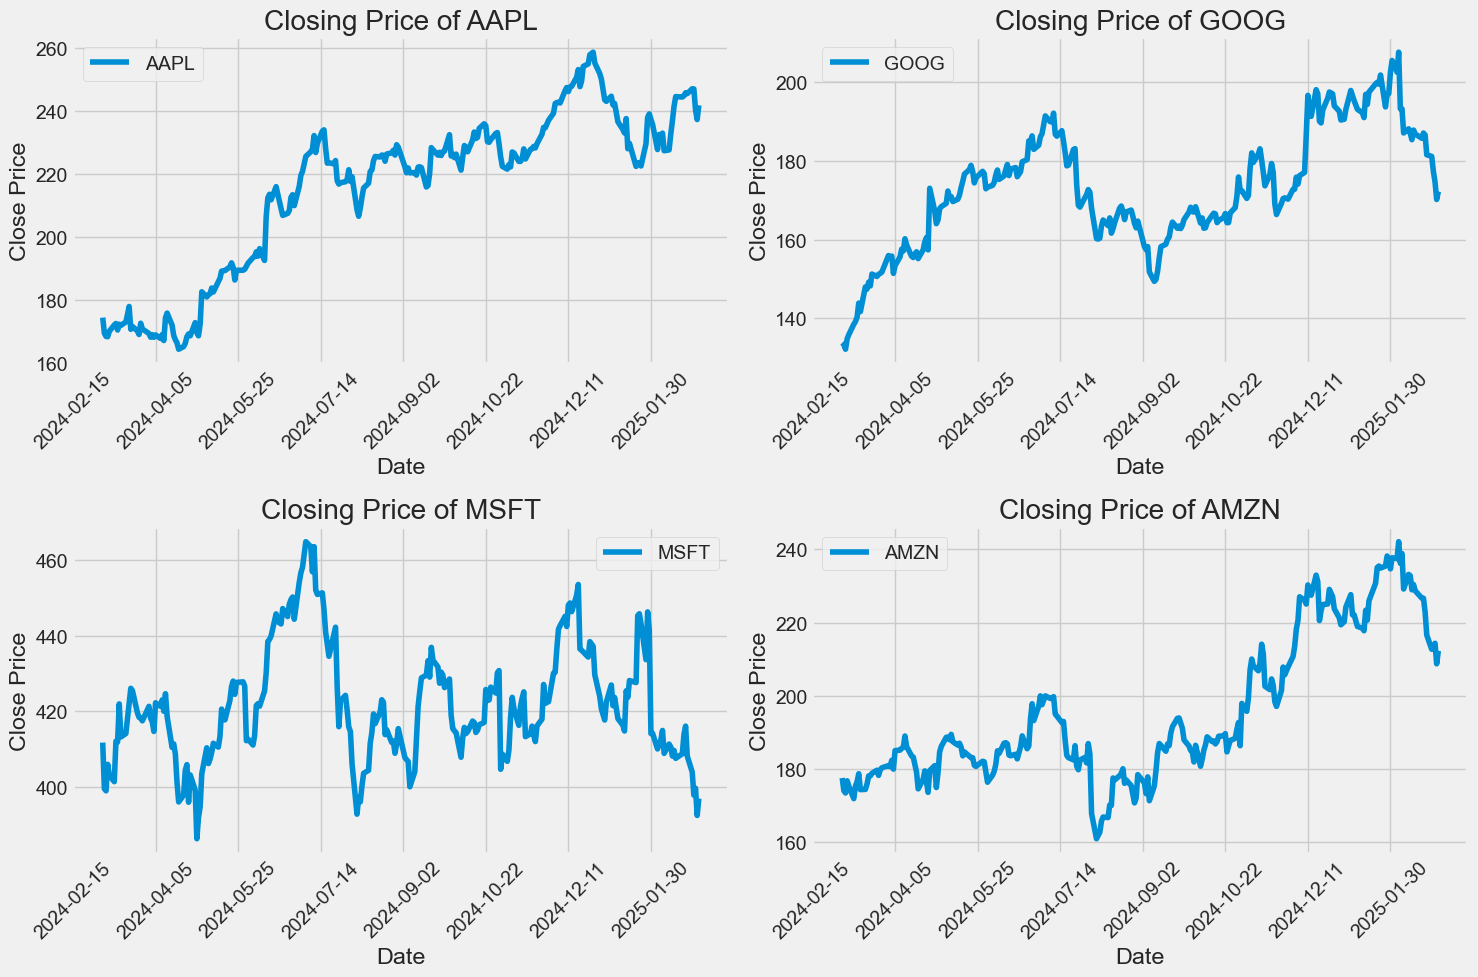

In [6]:
# Let's see a historical view of the closing price
import matplotlib.dates as mdates
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    
    company.index = pd.to_datetime(company.index)  
    plt.plot(company.index, company["Close"], label=tech_list[i - 1])

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))  # Format dates
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=50))  # Show every 5th day

    plt.xticks(rotation=45)  # Rotate date labels for better readability
    plt.ylabel("Close Price")
    plt.xlabel("Date")
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    plt.legend()

plt.tight_layout()
plt.show()

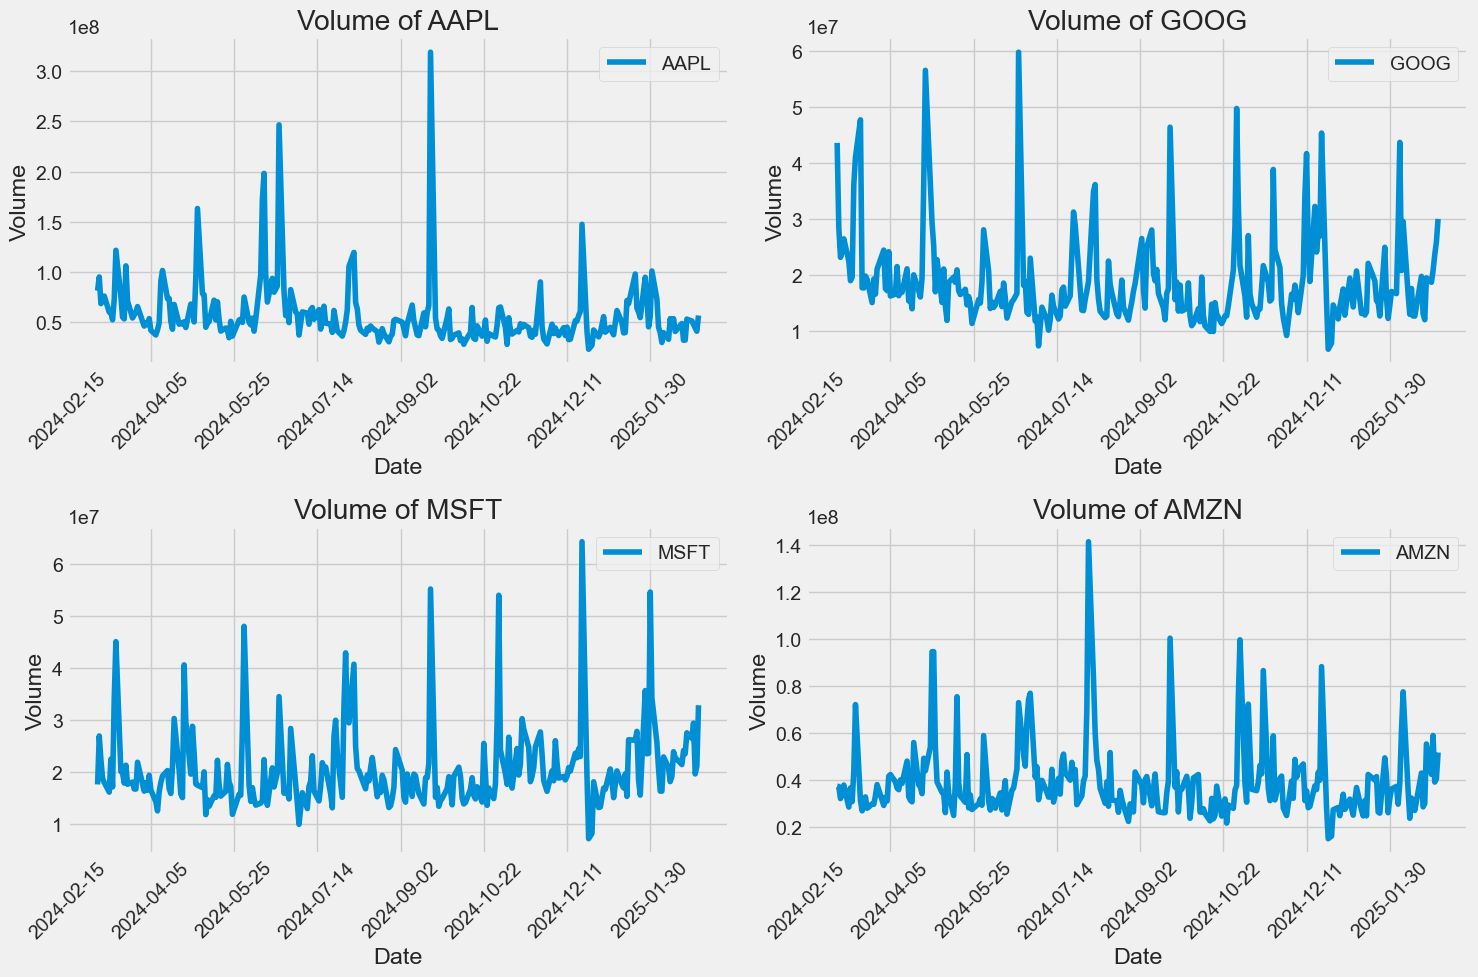

In [7]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    
    company.index = pd.to_datetime(company.index)  
    plt.plot(company.index, company["Volume"], label=tech_list[i - 1])

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))  # Format dates
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=50))  # Show every 5th day

    plt.xticks(rotation=45)  # Rotate date labels for better readability
    plt.ylabel("Volume")
    plt.xlabel("Date")
    plt.title(f"Volume of {tech_list[i - 1]}")
    plt.legend()

plt.tight_layout()
plt.show()

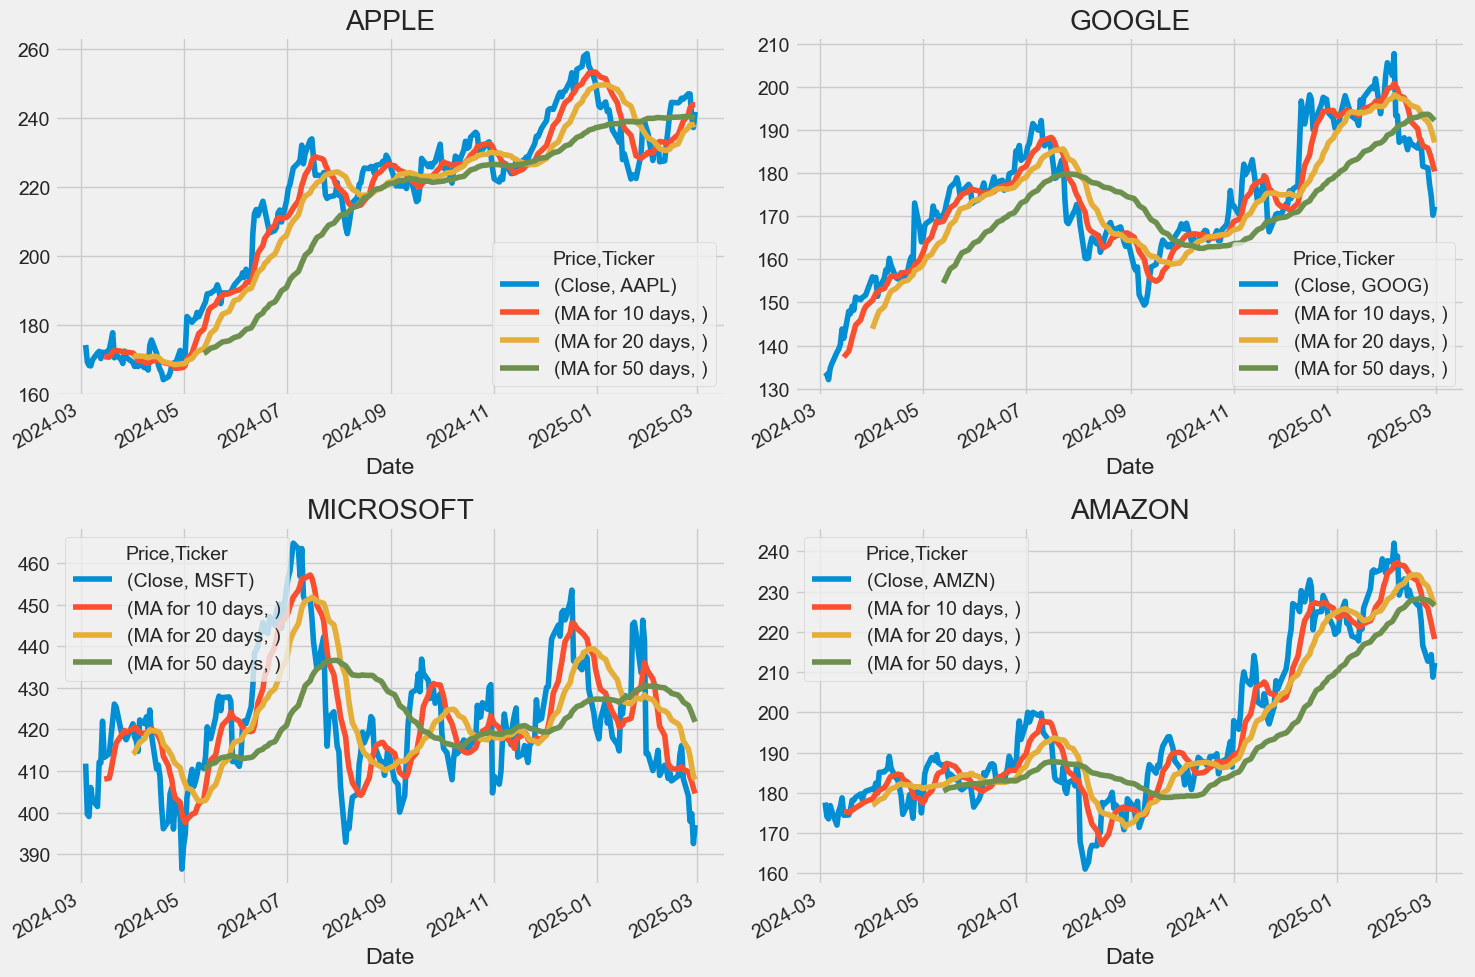

In [8]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

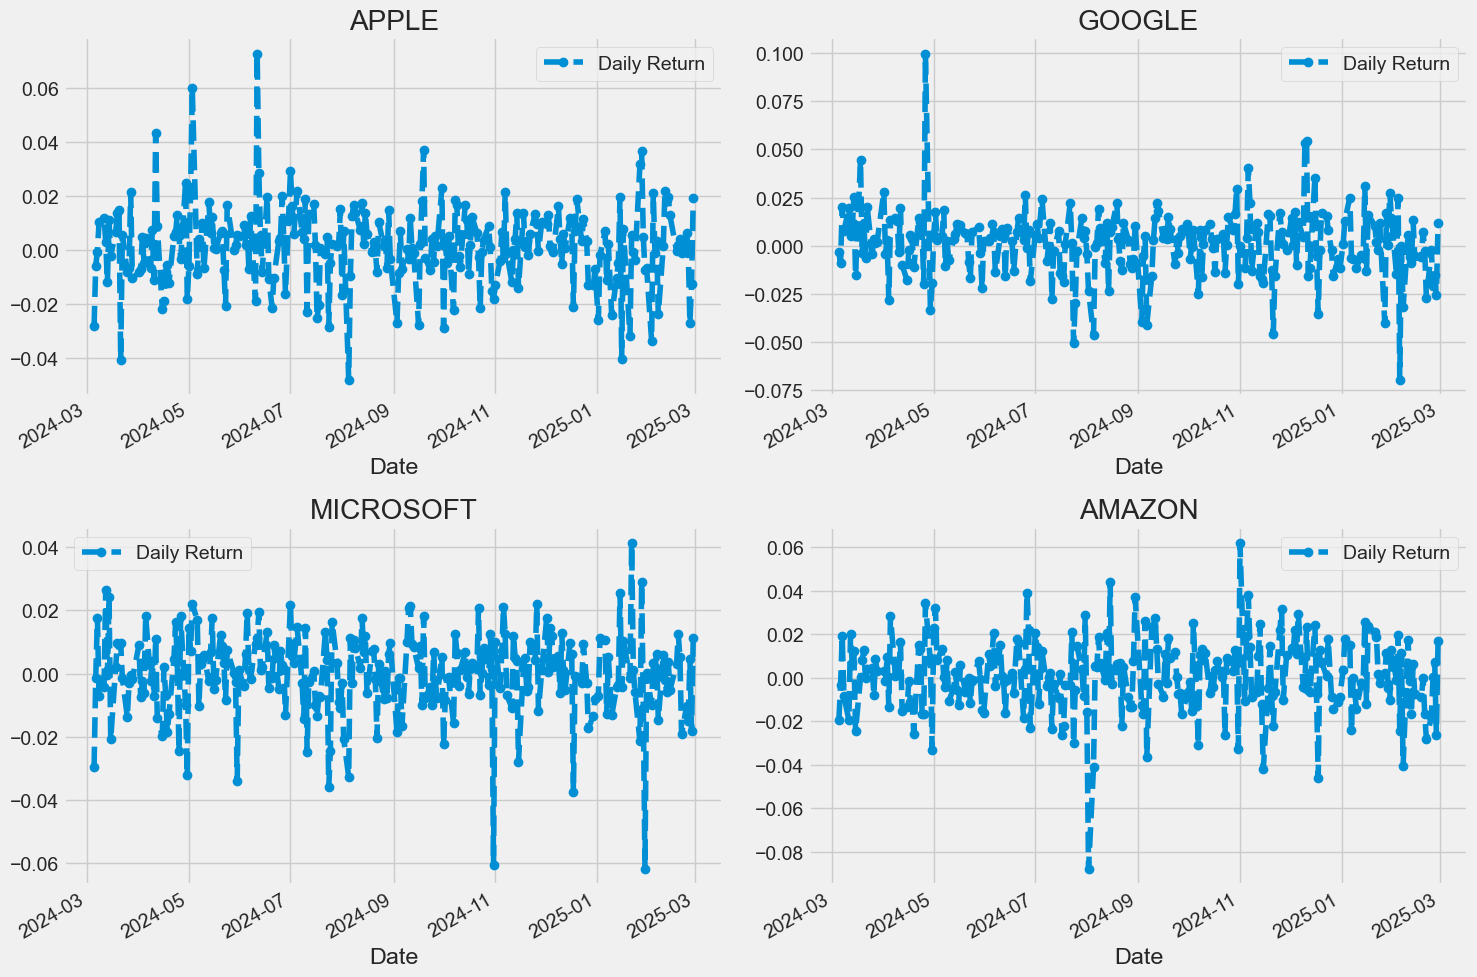

In [9]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

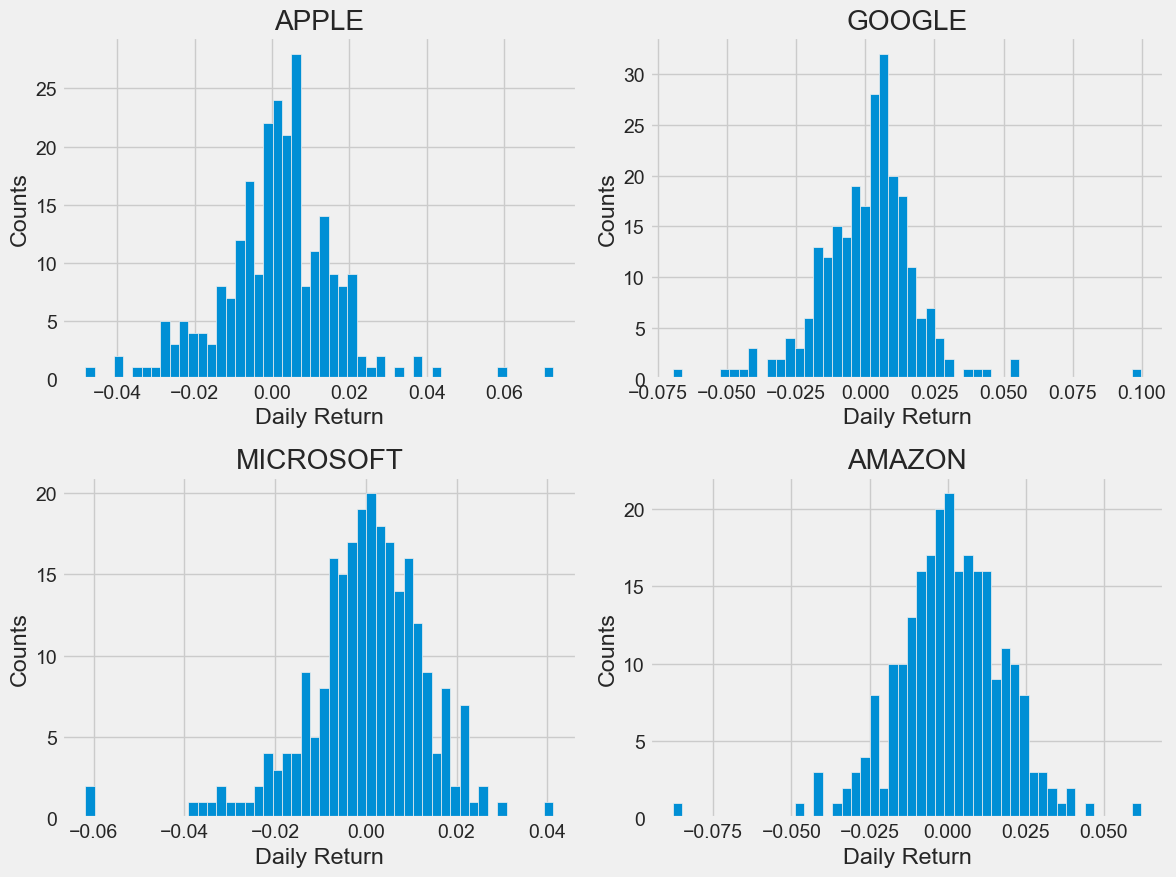

In [10]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [11]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = yf.download(tech_list, start=start, end=end)['Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()


[*********************100%***********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2024-03-04,NaN,NaN,NaN,NaN
2024-03-05,-0.028441,-0.019484,-0.003130,-0.029572
2024-03-06,-0.005878,-0.003503,-0.009120,-0.001391
2024-03-07,-0.000710,0.019077,0.020217,0.017533
2024-03-08,0.010237,-0.008314,0.007764,-0.007137


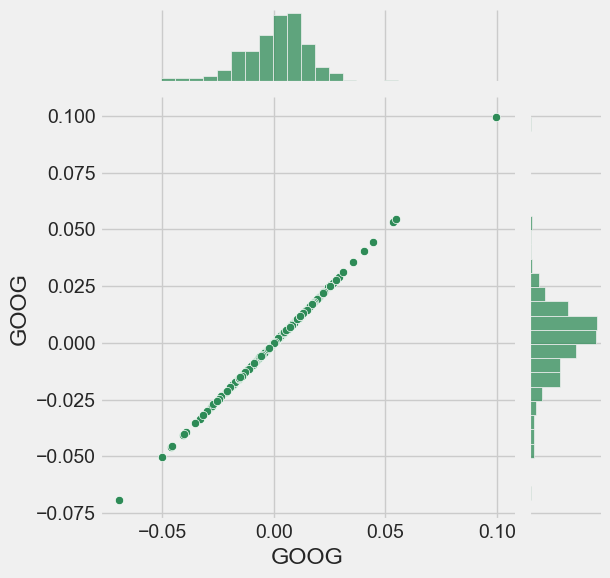

In [12]:
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

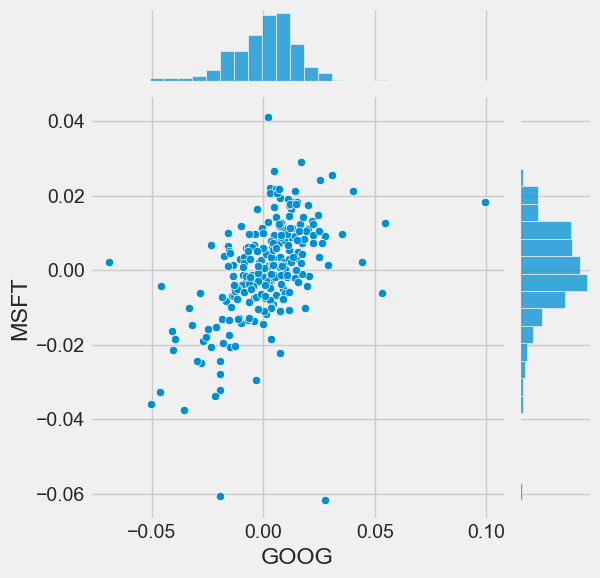

In [13]:
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

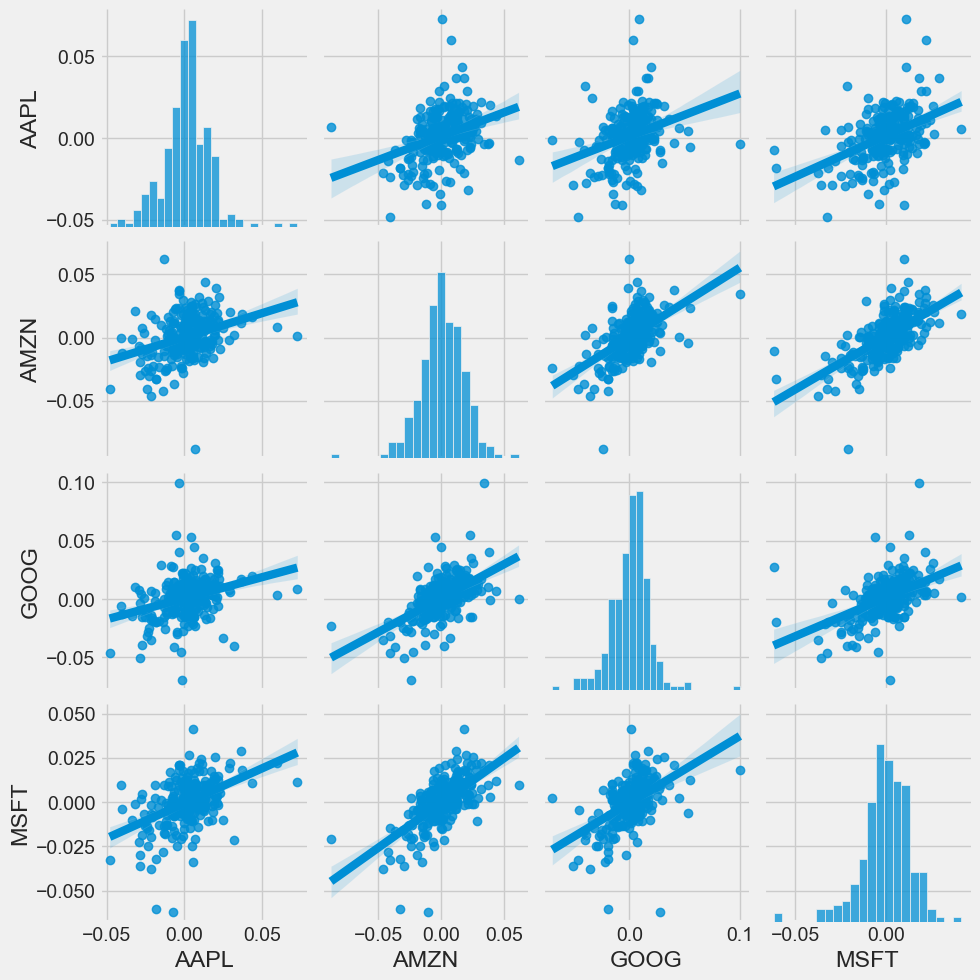

In [14]:
sns.pairplot(tech_rets, kind='reg')

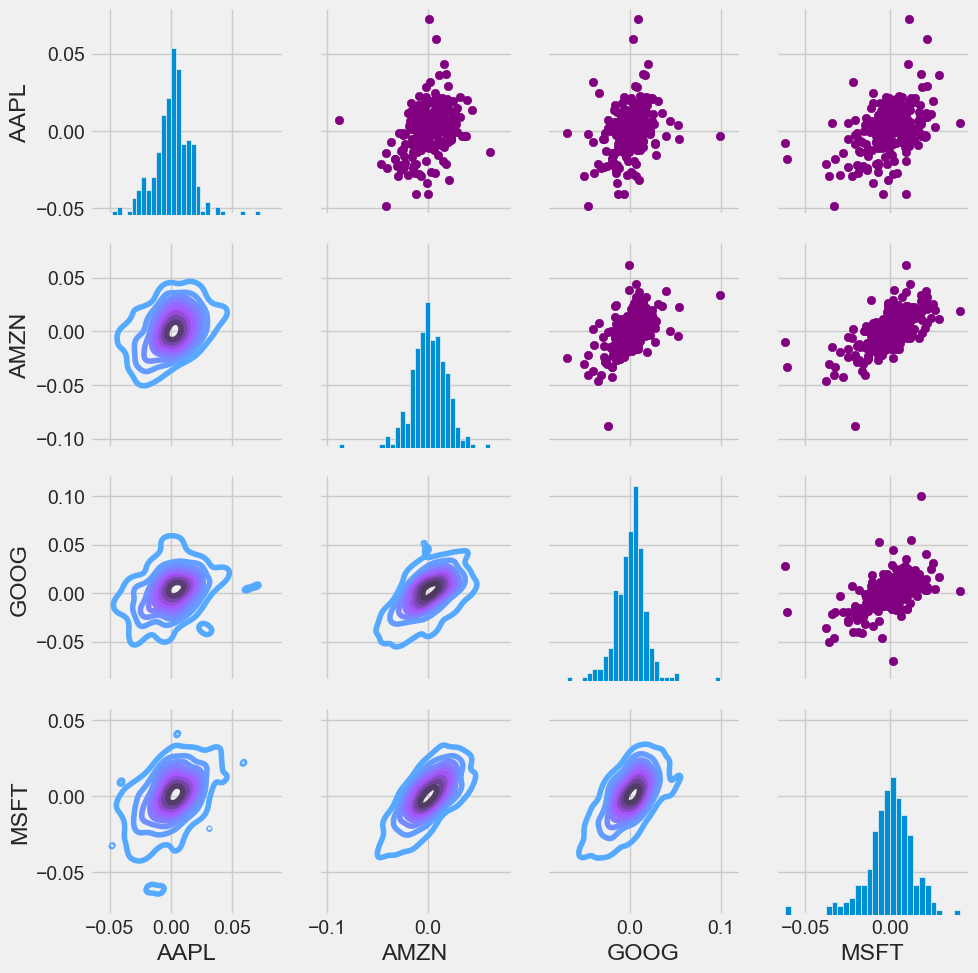

In [15]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

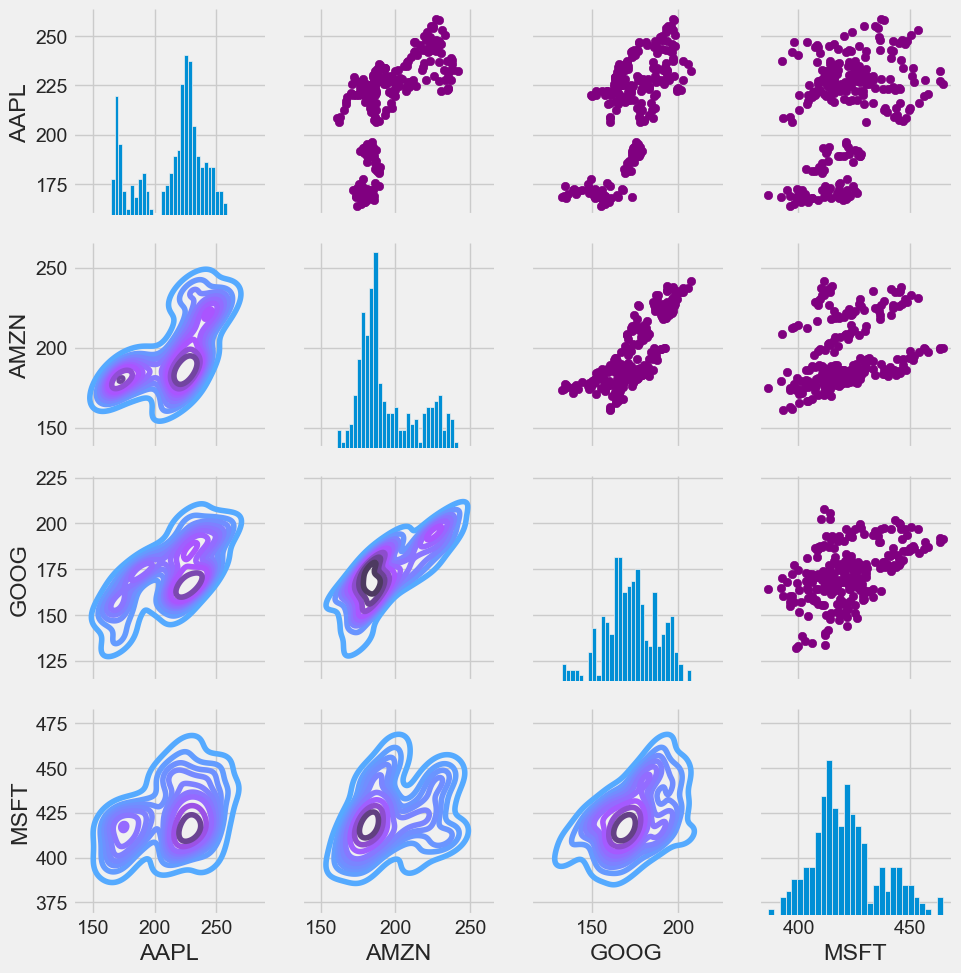

In [16]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

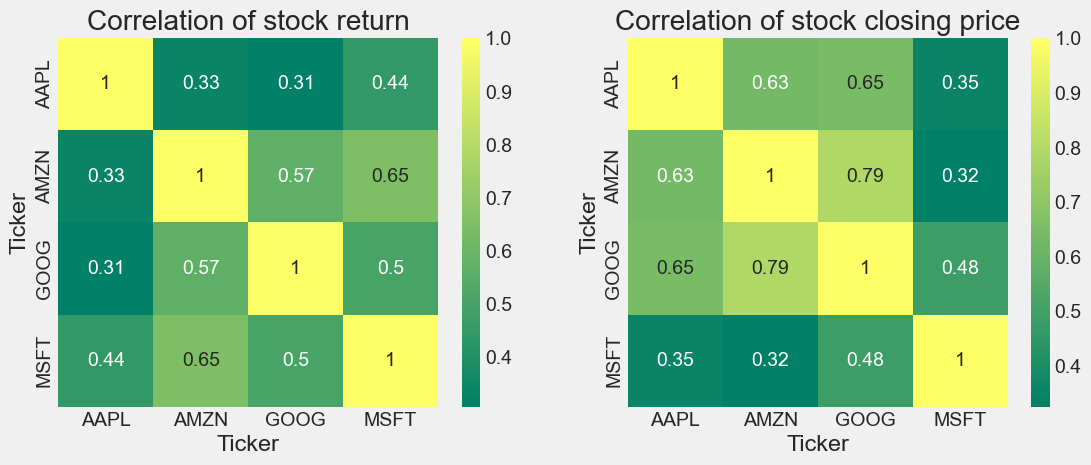

In [17]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')